# Step 1--Data Preprocessing

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import hvplot.pandas
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.shape

(10000, 3)

In [4]:
df.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

In [5]:
df.count()

Gender    10000
Height    10000
Weight    10000
dtype: int64

In [6]:
df['Gender'].value_counts()

Female    5000
Male      5000
Name: Gender, dtype: int64

# Missing Values

In [7]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

# EDA(Exploratory Data Analysis)

In [8]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


# Corelation between each variable

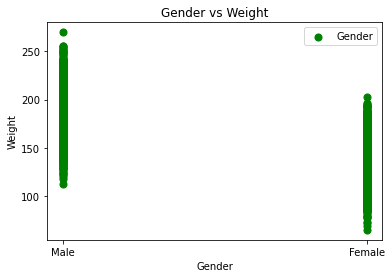

In [9]:
#Plot Gender vs Weight............
x1 = df.iloc[:, 0].values
y1 = df.iloc[:, 2].values
plt.scatter(x1,y1,label='Gender',color='Green',s=50)
plt.xlabel('Gender')
plt.ylabel('Weight')
plt.title('Gender vs Weight')
plt.legend()
plt.show()

# Weight and height are depandant

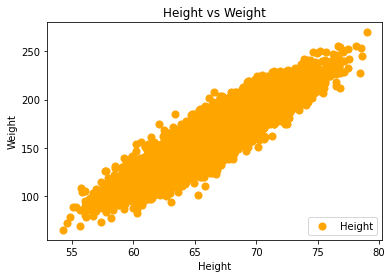

In [10]:
#Plot Height vs Weight............
x2 = df.iloc[:, 1].values
y2 = df.iloc[:, 2].values
plt.scatter(x2,y2,label='Height',color='Orange',s=50)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.legend(loc="lower right")
plt.show()

C:\Users\admin1\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin1\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


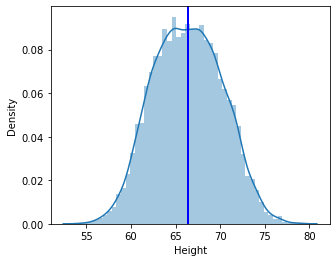

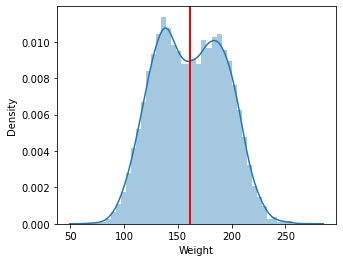

In [11]:
#df.hvplot.hist("Weight")
#df.hvplot.hist(by='Weight', subplots=False, width=1000)
plt.figure(figsize=(5, 4))
sns.distplot(df['Height']);
plt.axvline(df['Height'].mean(),color='blue',linewidth=2)

plt.figure(figsize=(5, 4))
sns.distplot(df['Weight']);
plt.axvline(df['Weight'].mean(),color='red',linewidth=2)

# Step 2-Splitting the dataset into training and testing set

In [12]:
#separating the dependent and independent values....
#X-Independent variable - Height
X = df.iloc[:, 1:2].values
print(X)

[[73.84701702]
 [68.78190405]
 [74.11010539]
 ...
 [63.86799221]
 [69.03424313]
 [61.94424588]]


In [13]:
#y-dependent or target variable
y = df.iloc[:, 2].values
print(y)

[241.89356318 162.31047252 212.74085556 ... 128.47531878 163.85246135
 113.64910268]


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Step 3-Build a linear model

In [15]:
#Creating linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#predicting the test set
y_pred = regressor.predict(X_test)

# Step 4-visualize the result

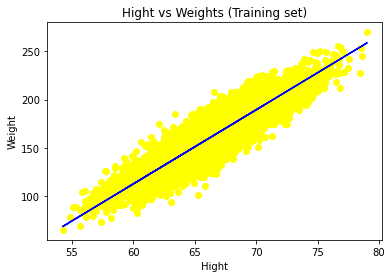

In [16]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'Yellow')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hight vs Weights (Training set)')
plt.xlabel('Hight')
plt.ylabel('Weight')
plt.show()

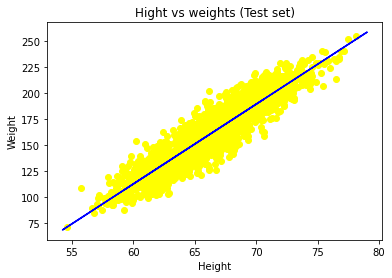

In [17]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'Yellow')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hight vs weights (Test set)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()


# Step 5-Checking the accuracy

In [18]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
print('Coefficients: ', regressor.coef_)
#print('INTERCEPT: ', regressor.intercept_)

# The mean squared error
print("Mean squared error: %.2f" % np.mean((regressor.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Model score: %.2f' % regressor.score(X_test, y_test))

Coefficients:  [7.70936331]
Mean squared error: 146.54
Model score: 0.86
